**<H3 align:right>DEFINING PROBLEM STATEMENT AND BUSINESS CASE</H3>** 
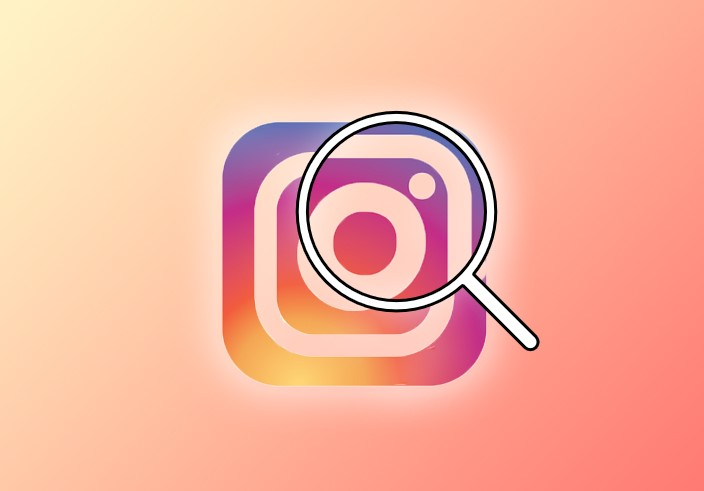



**<H3 align:right>FAKE INSTAGRAM ACOUNT DETECTOR</H3>** 

---
**<h4>UNDERSTANDING THE PROBLEM**



* This project aim is to build and train a deep neural network model to detect fake or spam instagram accounts.
*  These days spam accounts have become a major problem in in all the social media platforms.

* Many users are creating fake accounts to create an illusion of having many followers to thier personal accounts.


*  Fake accounts are being created to sell fake products and services. 
*  They are also being used to impersonate other account users from common people to celebrities in order to influence, criticize, hurt feelings and reputation.

<br>

*  There are few key input features which we considered to determine if the account is fake or not.

*   THE *INPUT FEATURES* ARE:


1.   **PROFILE PICTURE** - The user has profile picture or not.
2.   **NUMS/LENGTH USERNAM**E - The ratio of number of numerical chars in username to its length.
3.  **FULLNAME WORDS** - Full name in word tokens
4.   **NAME/LENGTH OF FULL NAME** - The ratio of number of numerical characters in full name to its length.
5.   **NAME == USERNAME** - Are username and full name literally the same?
6.   **DESCRIPTION LENGTH** - Bio length in characters.
7.   **EXTERNAL URL** - Has external URL or not.
8.   **PRIVATE** - Private or not.
9.   **POSTS** - Number of posts.
10.  **FOLLOWERS** - Number of followers.
11.  **FOLLOWS** - Number of follows.


**<h4> TRAINED DETECTOR MODEL:**

---
This model is trained such that it considers the above given features and determines whether a particular account is fake or not. By resulting the output as either 0 or 1 meaning TRUSTED or FAKE respectively. Our intention is to make this software capable of thinking like a human, based on the data it is given and results in maximum probability of success.





**HOW TO RUN THE CODE**

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".
[link text](https://)

#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running required commands on the terminal.

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


**<H3>TASK 1**

---

* **<h2>LOADING LIBRAIRES**











In [ ]:
 #installing tensorflow version 2.0
 !pip install tensorflow==2.0

     |████████████████████████████████| 86.3 MB 27 kB/s 
     |████████████████████████████████| 3.8 MB 40.7 MB/s 
     |████████████████████████████████| 449 kB 61.5 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=08e2fb3ae63b4e0a7b04599f5173abf14680a88753de57dda99c366a627c9df8
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

In [ ]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

In [ ]:
#styling purpose
!pip install jupyterthemes

     |████████████████████████████████| 7.0 MB 6.9 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 9.9 MB 67.1 MB/s 
     |████████████████████████████████| 49 kB 7.6 MB/s 
     |████████████████████████████████| 428 kB 62.7 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.4 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is 

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

* **<H2>LOADING DATASETS**

---



In [ ]:
#Load the training and testing datasets
instagram_df_test = pd.read_csv('test.csv')
instagram_df_train = pd.read_csv('train.csv')

In [ ]:
#the dataset which will be used for training purpose (576 records)
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
#the dataset which will be used for testing purpose (120 records)
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


**<H1>TASK 2: <h3>PERFORMING EXPLORATORY DATA ANALYSIS**

---



*   **<h3><i>Performing Exploratory Data Anlaysis For "Training Dataset"**

In [ ]:
#Getting dataframe info

instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
#Statistical summary of the dataframe
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
#Check if null values exist
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
#Number of unique values in the profile pic column
instagram_df_train['profile pic'].value_counts()

1    404
0    172
Name: profile pic, dtype: int64

In [ ]:
#Number of fake and real accounts
instagram_df_train['fake'].value_counts()

1    288
0    288
Name: fake, dtype: int64

In [ ]:
#Number of accounts having an external URL
instagram_df_train['external URL'].value_counts()

0    509
1     67
Name: external URL, dtype: int64

In [ ]:
#Number of accounts having description length over 50
(instagram_df_train['description length'] > 50).sum()

98



*   **<h2><i>Performing Exploratory Data Anlaysis For "Testing Dataset"**



In [ ]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [ ]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [ ]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
instagram_df_test['fake'].value_counts()

1    60
0    60
Name: fake, dtype: int64

**<H1>TASK 3**

---


**<h2>PERFROMING DATA VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


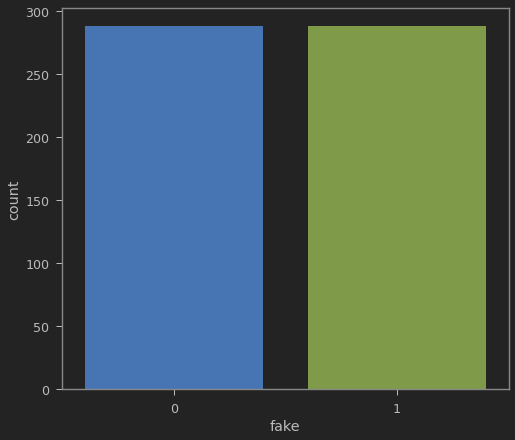

In [ ]:
#Vislualizing the number of fake and real accounts (using seaborn library)
sns.countplot(instagram_df_train['fake'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


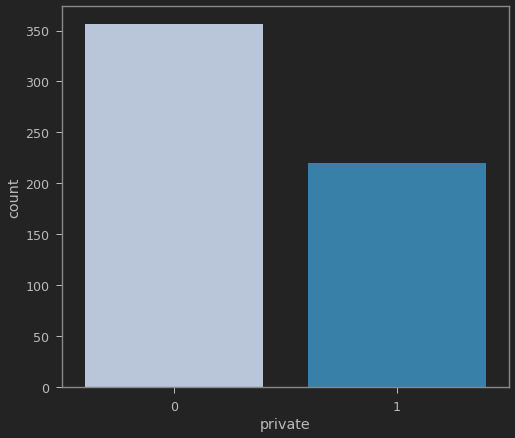

In [ ]:
#Visualizing the private column
sns.countplot(instagram_df_train['private'],palette = "PuBu")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


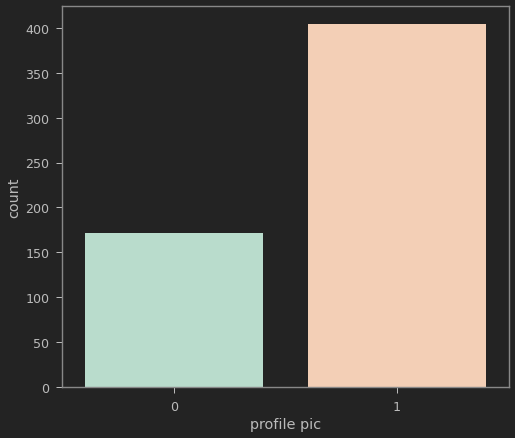

In [ ]:
#Visualizing the profile pic feature
sns.countplot(instagram_df_train['profile pic'],palette = "Pastel2")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


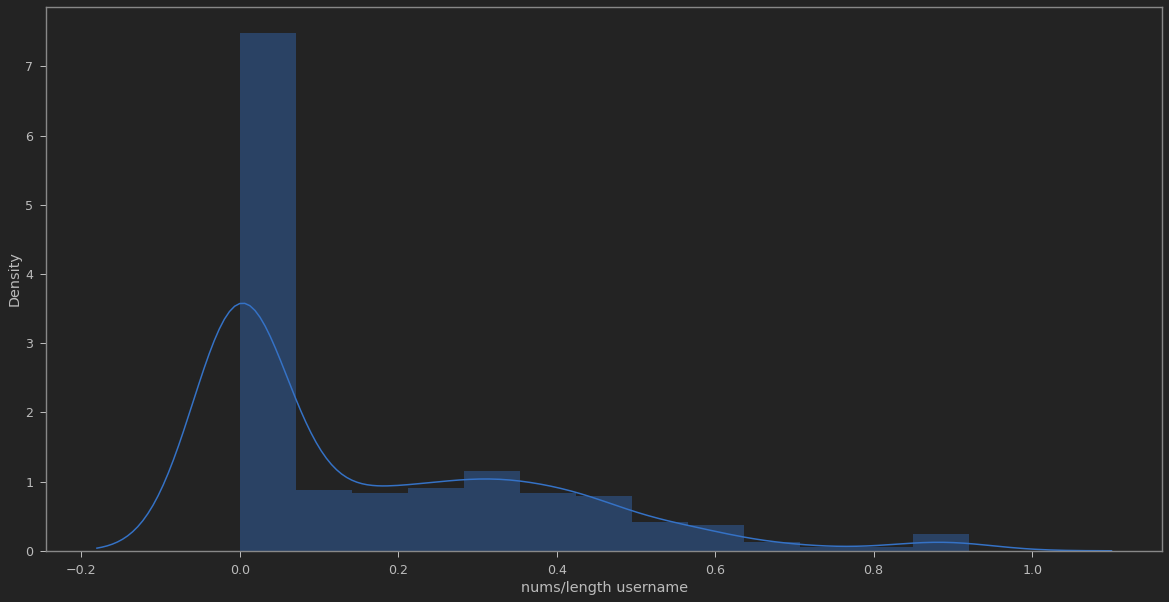

In [ ]:
#Visualizing the length of usernames(Histogram)
plt.figure(figsize = (20, 10))
sns.distplot(instagram_df_train['nums/length username'],kde=True)

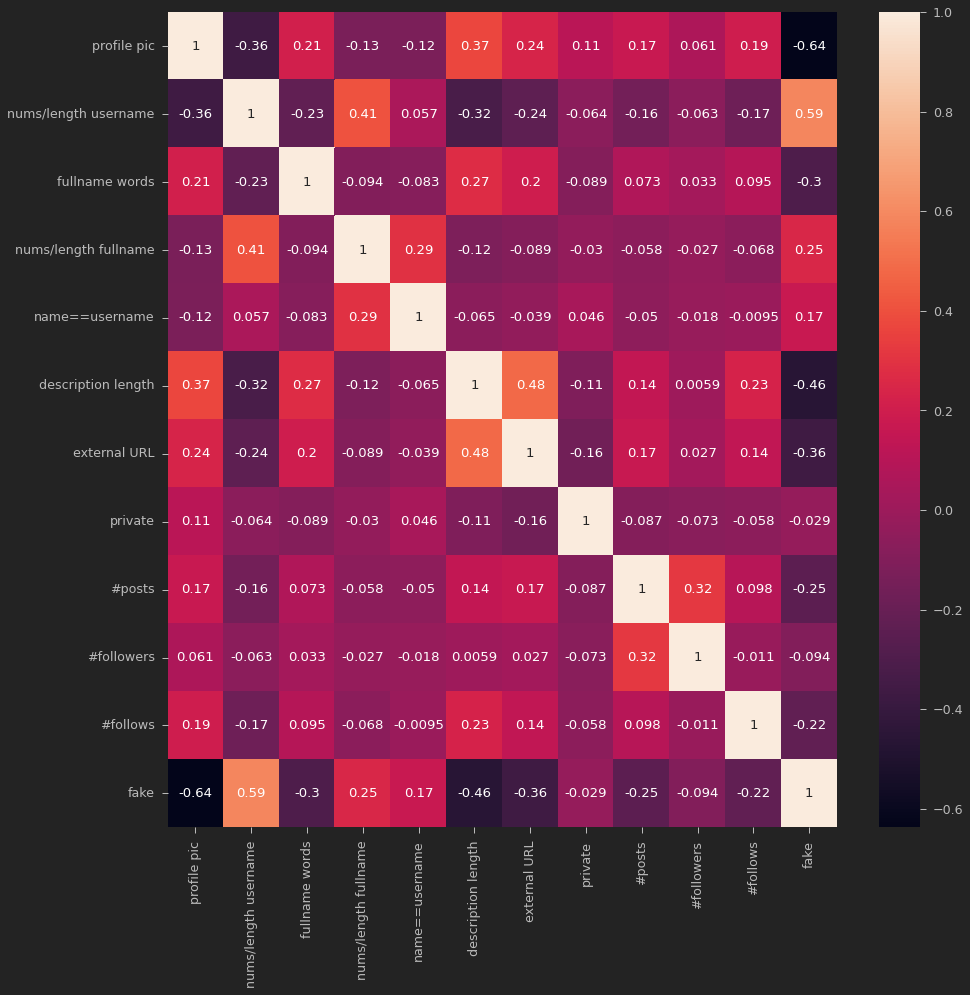

In [ ]:
#Correlation heatmap
plt.figure(figsize=(15,15))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


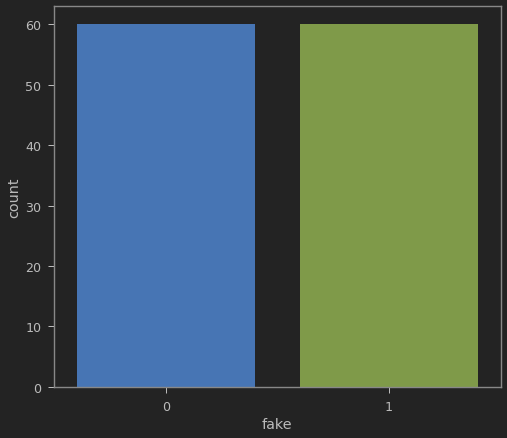

In [ ]:
sns.countplot(instagram_df_test['fake'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


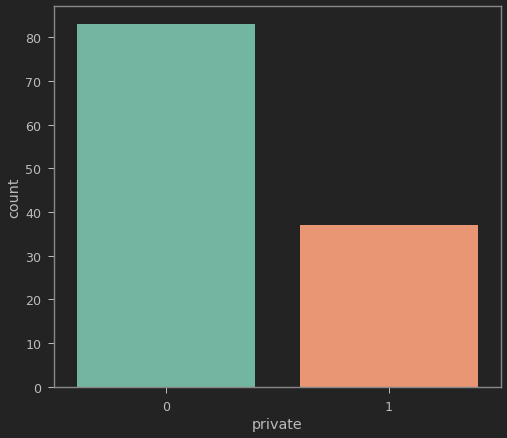

In [ ]:
sns.countplot(instagram_df_test['private'],palette = "Set2")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


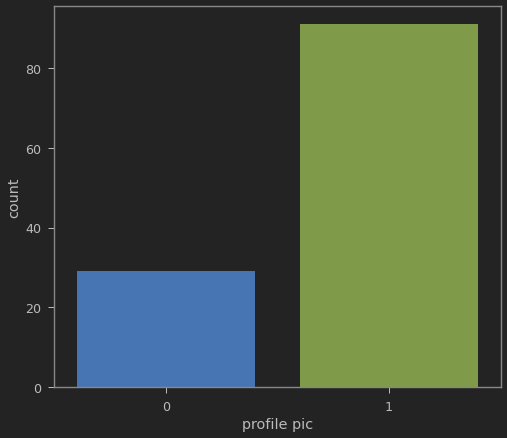

In [ ]:
sns.countplot(instagram_df_test['profile pic'])

**<H1>TASK 4**

---

**<h2>PREPARING THE DATA TO FEED THE MODEL**

In [ ]:
#Preparing inputs for the model (Dropping the fake column from both training and testing dataset)
x_train = instagram_df_train.drop(columns = ['fake'])
x_test = instagram_df_test.drop(columns = ['fake'])
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
x_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [ ]:
#Preparing the outputs (Takin only the fake column into consideration.)
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [ ]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [ ]:
#Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [ ]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
#Having a look at the shapes after scaling the data
X_train.shape,X_test.shape

((576, 11), (120, 11))

In [ ]:
Y_train.shape,Y_test.shape

((576, 2), (120, 2))

In [ ]:
#Percentage of Traininf data
Training_data_percentage = len(X_train)/(len(X_train) + len(X_test) ) * 100
Training_data_percentage


82.75862068965517

In [ ]:
Testing_data_percentage = len(X_test)/(len(X_train) + len(X_test) ) * 100
Testing_data_percentage


17.24137931034483

**<H1>TASK 5**

---

 **<H3><i>UNDERSTANDING THEORY AND INTUITION BEHIND NEURAL NETWORKS**

<br>

<H3><center>NEURAL MATHEMATICAL MODEL:</center></i>
<br>

* The neuron collects information from input channels named dendrites, processes information in its nucleus and then generates an output in a long thin branch called Axon.

<br>

<i><center> SINGLE NEURON MODEL: </center> </i> <br>

<center>

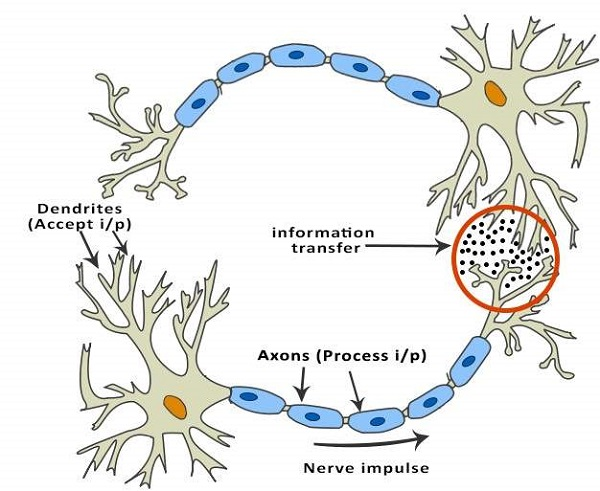

</center>

<h7>credits:https://www.tutorialspoint.com/artificial_intelligence/images/neuron.jpg </h7>


* Consists the three main aspects, that are Dendrites, Nucleus and Axon these are considered as  Independent variables, Processing operations and Activation function respectively. 

* Considering the independent variables as X2,X2,X3.. Xn Operations processor as as some 'P', and activation functions as 'F'.

* Some of the **Activation Functions** are:

<br>

**1.   Sigmoid**


*   Takes a number between 0 and 1
*   Converts large negative numbers to zero and converts large positive numbers to 1 
*   It is generally used as Output Layer. but in  our model, we are using softmax as the ouput layer. 

<br>

**2. Softmax**

* The softmax function is sometimes called the softargmax function, or multi-class logistic regression. This is because the softmax is a generalization of logistic regression that can be used for multi-class classification, and its formula is very similar to the sigmoid function which is used for logistic regression. 

* he softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to a user or used as input to other systems. For this reason it is usual to append a softmax function as the final layer of the neural network.

<br>

**3. RELU- Rectified Linear Units**

*  ReLu is a non-linear activation function that is used in multi-layer neural networks or deep neural networks.
*  ReLu function has been used instead to calculate the activation values in traditional neural network or deep neural network paradigms.  
*  ReLu function is able to accelerate the training speed of deep neural networks compared to traditional activation functions since the derivative of ReLu is 1 for a positive input.
* Generally used in Hidden Layers.

<br>

**<h4> EXAMPLE</h4>**

* Assume an example for an activation function of unit step.
* These activation functions are used to map the input between 0 and 1 (0,1).
 
<br>

**<h3> ANN TRAINING PROCESS**

---
*  ANN is rarely used for predictive modelling. The reason being that Artificial Neural Networks (ANN) usually tries to over-fit the relationship. ANN is generally used in cases where what has happened in past is repeated almost exactly in same way.





* **<H3>GRADIENT DESCENT**




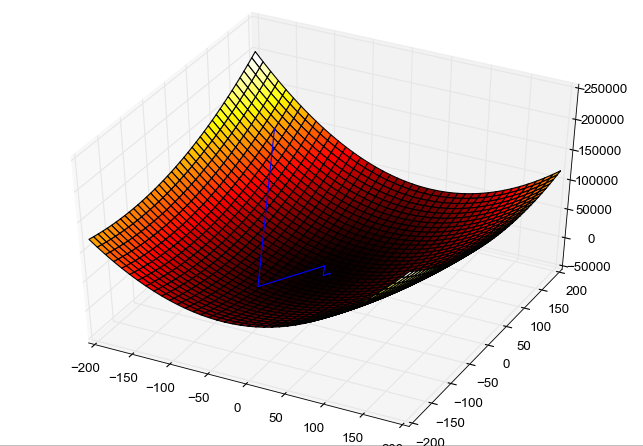



<br>
<br>

<h6>credits:https://miro.medium.com/max/1286/1*DrJAzS7VSKdMCZj4XFKn1Q.png</h6>

<br>

1. Gradient descent is an optimization algorithm used to obtain the optimized network weight and bias values.

2. It works by iteratively trying to minimize the cost function.
3. It works by calculating the gradient of the cost function and negative direction until the local orgloal minimum is achieved.

4. If the postive of the gradient is taken, local or global maximum is achieved.


* **<h3>BACK PROPAGATION**

1. Back propaagtion is used to train ANN's by calculationg gradient needed to update network weigths.

2. It is commonly iused as gradient descent optimizaion algorithm to adgust the weight of neurons by calcl=ulating the gradient of the loss function.

3. <i>PHASE 1:<i>
    
   * Propagation forward through the network to generate the output value(s)
  * Calculation of the cost (error term).
  * Propagation of output actications back through network using training pattern target in order to geerate the deltas (differences between targeted and actual output values).
  
4. <i>PHASE 2:</i>
     * Weight update
     * Calculating weight gradient.
     * This ratio influences the speed and quality of learning also caled as learning rate. The greater the ratio, the faster neuron train, but lower ratio, more accurate the training is.








**<H1>TASK-6**

---

**<h2><I>BUILD A SIMPLE DEEP LEARNING MODEL**


In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#Building the main model***

model = Sequential() 
model.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
model.add(Dropout(0.3))
model.add(Dense(150, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(25, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation = "softmax")) #output layer

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                600       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3775      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 5

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Train on 518 samples, validate on 58 samples
Epoch 1/20
518/518 [==============================] - 1s 2ms/sample - loss: 0.5963 - accuracy: 0.6815 - val_loss: 0.3304 - val_accuracy: 0.8621
Epoch 2/20
518/518 [==============================] - 0s 96us/sample - loss: 0.4541 - accuracy: 0.8533 - val_loss: 0.2489 - val_accuracy: 0.8276
Epoch 3/20
518/518 [==============================] - 0s 99us/sample - loss: 0.3558 - accuracy: 0.8842 - val_loss: 0.2463 - val_accuracy: 0.8448
Epoch 4/20
518/518 [==============================] - 0s 94us/sample - loss: 0.3120 - accuracy: 0.8900 - val_loss: 0.2779 - val_accuracy: 0.8276
Epoch 5/20
518/518 [==============================] - 0s 94us/sample - loss: 0.2973 - accuracy: 0.8919 - val_loss: 0.2165 - val_accuracy: 0.8793
Epoch 6/20
518/518 [==============================] - 0s 108us/sample - loss: 0.3052 - accuracy: 0.8958 - val_loss: 0.2102 - val_accuracy: 0.8793
Epoch 7/20
518/518 [==============================] - 0s 97us/sample - loss: 0.2799 -

**<h2> TASK-7</h2>**

---


**<h2><i>ASSESSING THE PRERFORMANCE OF THE MODEL**

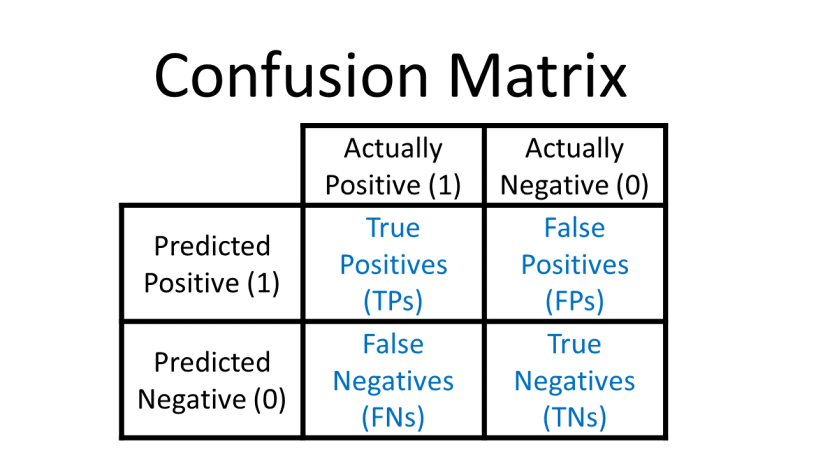

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


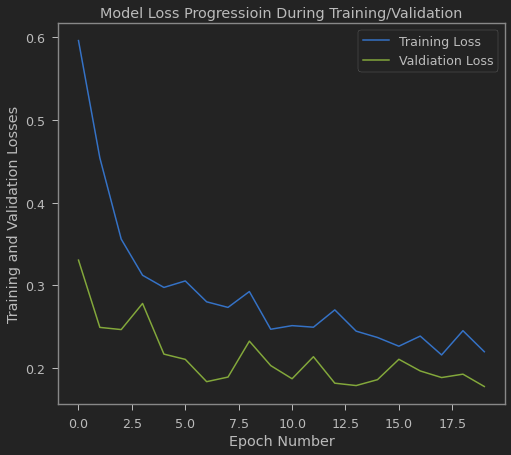

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])


In [ ]:
predicted = model.predict(X_test)

In [ ]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [ ]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.91      0.85      0.88        60

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.88       120
weighted avg       0.89      0.88      0.88       120



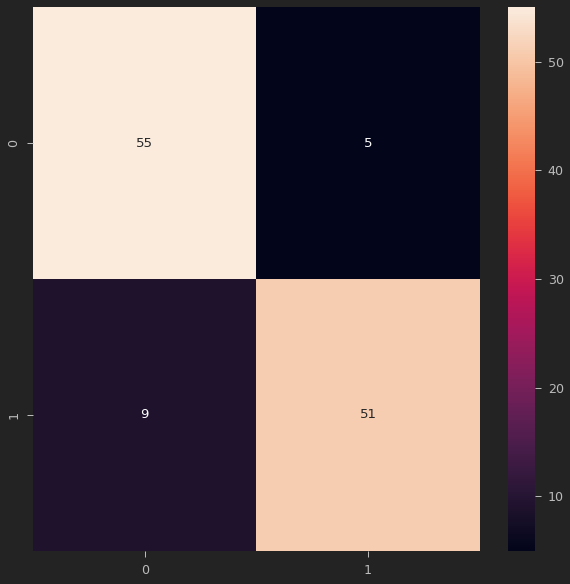

In [ ]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

**<h2> INFERENCES AND CONCLUSION: </h2>**

<i>

* Thus, we have analyzed the dataset and obtained a fairly accurate predictive model using Neural networks.

* The model is hence trained to detect fake accounts in instagram based on the considered features.

* We achieved 95 percent accuracy in detecting the fake accounts by training the model using  datasets (from train.csv) . We have checked whether the model has reached the ability to detect an account is fake or not by inputting different set of data values (test.csv file) which consisted 120 account details. 

* The model predicted true values for 106 accounts and predicted false values for 14 accounts out of 120 accounts.

**<h2> REFERENCES : </h2>**
Check out the following resources to learn more about the tools and libraries used in this notebook:

<i>


* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

* Tensorflow user guide : https://www.tensorflow.org/guide

* Tenorflow Playground : https://playground.tensorflow.org

* Neural Networks : https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464
